# Analisis explroatorio de los datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# Datos

In [2]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [5]:
dfpropiedades=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfpropiedadescleanfinal')
dfpropiedades.head()

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,tipo_propiedad
0,0,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,1380000000,32000.0,5,6.0,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,casa
1,0,https://www.fincaraiz.com.co/casa-en-venta/san...,Casa en Venta San Antonio de Pereira villas de...,570000000,15000.0,3,3.0,1,Casa en venta en Villas de Gualanday por 580 m...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,san antonio de pereira,casa
2,0,https://www.fincaraiz.com.co/casa-en-venta/mar...,Casa en Venta Marinilla Monteverde,290000000,10600.0,3,3.0,1,Gran oportunidad Vendo casa unifamiliar no pag...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,casa
3,1,https://www.fincaraiz.com.co/altos-de-santana/...,ALTOS DE SANTANA Oriente Antioqueño - Rionegro,360002000,73372.0,3,3.0,0,6351568 Proyecto de apartamentos de 2 y 3 habi...,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,rionegro,apartamento
4,0,https://www.fincaraiz.com.co/finca-en-venta/ma...,Finca en Venta Marinilla Marinilla,385000000,22000.0,4,2.0,0,Finca en vereda tranquila y segura. A 40 minu...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,finca


In [6]:
dfpropiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo                      2126 non-null   int64  
 1   url                       2126 non-null   object 
 2   titulo                    2126 non-null   object 
 3   precio                    2126 non-null   int64  
 4   area                      2126 non-null   float64
 5   habitaciones              2126 non-null   int64  
 6   banos                     2126 non-null   float64
 7   garajes                   2126 non-null   int64  
 8   descripcion               2126 non-null   object 
 9   balcon                    2126 non-null   float64
 10  trasn. publico            2126 non-null   float64
 11  caractint                 2126 non-null   object 
 12  caractext                 2126 non-null   object 
 13  caractsec                 2126 non-null   object 
 14  estrato 

# Analisis univariado

In [9]:
dfpropiedades.describe()

,tipo,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,...,bano aux,zona lavanderia,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet
count,2126.000000,2.126000e+03,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,0.004704,6.236556e+08,11914.021572,3.136877,2.832079,1.408749,0.555033,0.599247,4.019285,1.157103,...,0.470367,0.558325,0.464722,0.415804,0.458608,0.340075,0.396049,0.436500,0.553622,0.347131
std,0.068438,4.831122e+08,11222.515007,1.101693,1.200206,1.689246,0.497079,0.490166,0.878557,0.899550,...,0.499239,0.496703,0.498871,0.492976,0.498401,0.473846,0.489190,0.496068,0.497233,0.476170
min,0.000000,1.490000e+08,1.132000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000e+08,5700.000000,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.395000e+08,8200.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,7.960000e+08,16200.000000,4.000000,4.000000,2.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.300000e+09,75800.000000,10.000000,9.000000,11.000000,1.000000,1.000000,6.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


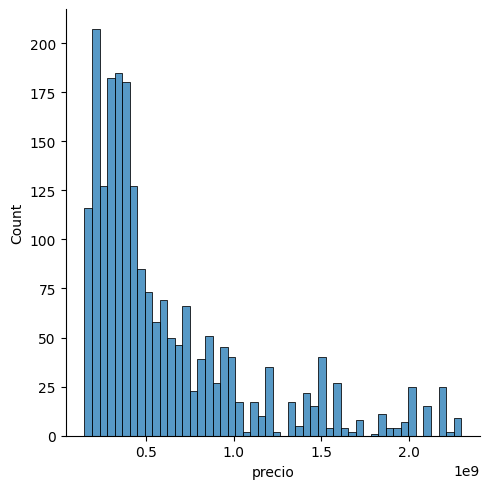

In [17]:
# distribucion de la variable precio
sns.displot(dfpropiedades['precio'],bins=50)

Se puede observar un sesgo hacia la izquierda de los datos, es decir, la concentracion de datos de precios de viviendas se concentra en los precios mas bajos, es mas difcil encontrar viviendas con precios altos 

In [24]:
# precio de las 5 viviendas mas costosas
dfpropiedades['precio'].nlargest(5)

14     2300000000
87     2300000000
256    2300000000
431    2300000000
495    2300000000
Name: precio, dtype: int64

In [25]:
# precio de las 5 viviendas mas economicas
dfpropiedades['precio'].nsmallest(5)

706     149000000
1925    149000000
992     150000000
1561    150000000
1797    150000000
Name: precio, dtype: int64

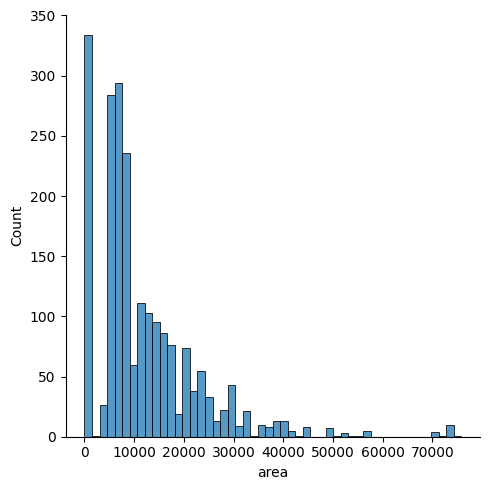

In [23]:
# distribucion de la variable area
sns.displot(dfpropiedades['area'],bins=50)

Se puede observar un sesgo hacia la izquierda de los datos, es decir, la concentracion de datos del area de las viviendas se concentra en las areas mas bajos, es mas difcil encontrar viviendas con grandes extensidades de terreno.
De aqui se puede deducir que hay un auge en la venta de apartamentos

In [27]:
# area de las casas mas peqeñas
dfpropiedades['area'].nsmallest(5)

396     1.132
288     1.150
148     1.200
1809    1.200
1811    1.200
Name: area, dtype: float64

In [28]:
# area de las casas mas grandes
dfpropiedades['area'].nlargest(5)

2004    75800.0
3       73372.0
140     73372.0
143     73372.0
149     73372.0
Name: area, dtype: float64